# Лабораторная работа 3 Линейная КУ

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def P_squared(x):
    """Коэффициент P²(x) в дифференциальном уравнении"""
    return 10.0 + np.sin(2 * np.pi * x)

def right_part(x):
    """Правая часть дифференциального уравнения f(x)"""
    return np.cos(2 * np.pi * x)

In [54]:
def thomas_algorithm(a, b, c, d):
    """
    Реализация алгоритма Томаса (прогонки) для трехдиагональных систем
    Аргументы:
        a - нижняя диагональ (под главной)
        b - главная диагональ
        c - верхняя диагональ (над главной)
        d - правая часть системы
    """
    n = len(b)
    
    # Прямой ход прогонки
    for i in range(1, n):
        m = a[i] / b[i - 1]   # Вычисление прогоночного коэффициента
        b[i] -= m * c[i - 1]  # Модификация диагонального элемента
        d[i] -= m * d[i - 1]  # Модификация правой части
    
    # Обратный ход прогонки
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]  # Начальное значение с конца
    
    for i in range(n - 2, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]  # Вычисление решения
    
    return x

In [55]:
def solve_periodic_tridiagonal(a, b, c, d):
    """
    Решение периодической трехдиагональной системы
    с использованием модифицированного алгоритма прогонки
    """
    n = len(b)
    
    # Создаем модифицированные диагонали без периодических связей
    a_mod = a.copy()
    c_mod = c.copy()
    a_mod[0] = 0.0    # Обнуляем связь y_0 с y_{n-1}
    c_mod[-1] = 0.0   # Обнуляем связь y_{n-1} с y_0
    
    # Решаем основную систему
    y_basic = thomas_algorithm(a_mod.copy(), b.copy(), c_mod.copy(), d.copy())
    
    # Формируем специальную правую часть для учета периодичности
    r = np.zeros(n)
    r[0] = -a[0]     # Коэффициент связи y_0 с y_{n-1}
    r[-1] = -c[-1]   # Коэффициент связи y_{n-1} с y_0
    
    # Решаем вспомогательную систему
    z = thomas_algorithm(a_mod.copy(), b.copy(), c_mod.copy(), r)
    
    # Вычисляем коэффициент для линейной комбинации решений
    alpha = (y_basic[0] - y_basic[-1]) / (z[0] - z[-1] + 1e-14)  # +1e-14 для избежания деления на 0
    
    # Возвращаем комбинацию решений
    return y_basic + alpha * z

In [56]:
def solve_problem(h=0.005):
    """
    Основная функция решения дифференциального уравнения
    с периодическими граничными условиями
    Аргументы:
        h - шаг сетки
    Возвращает:
        x - массив узлов сетки
        y - массив значений решения в узлах
    """
    N = int(1 / h)                  # Количество узлов сетки
    x = np.linspace(0, 1 - h, N)    # Создание равномерной сетки (исключаем точку 1.0 из-за периодичности)
    
    # Инициализация коэффициентов трехдиагональной матрицы
    a = np.ones(N) * (1 / h**2)     # Нижняя диагональ
    b = np.zeros(N)                 # Главная диагональ
    c = np.ones(N) * (1 / h**2)     # Верхняя диагональ
    d = np.zeros(N)                 # Правая часть системы
    
    # Заполнение матрицы системы и правой части
    for i in range(N):
        b[i] = -2 / h**2 - P_squared(x[i])  # Диагональный элемент
        d[i] = right_part(x[i])             # Правая часть
    
    # Решение системы
    y = solve_periodic_tridiagonal(a, b, c, d)
    
    return x, y

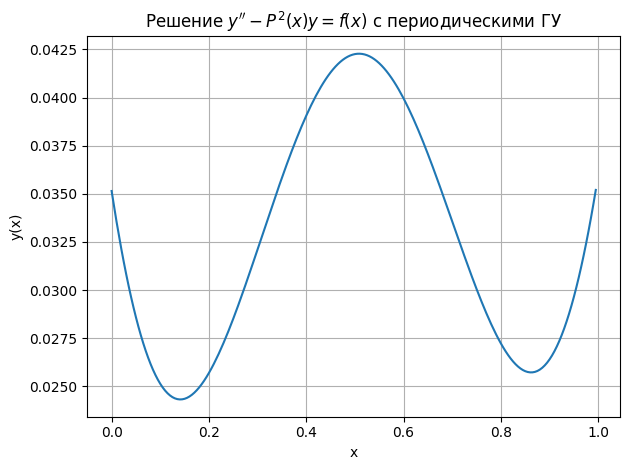

In [57]:
if __name__ == "__main__":
    # Получение и визуализация решения
    x, y = solve_problem()
    
    plt.plot(x, y)
    plt.title("Решение $y'' - P^2(x)y = f(x)$ с периодическими ГУ")
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Вывод: решение периодической краевой задачи

Обычный алгоритм Томаса (прогонка) работает **только** для строго трехдиагональных систем вида:


In [ ]:
| b0  c0  0   ··· 0 |
| a1  b1  c1  ··· 0 |
| 0   a1  b1  ··· 0 |
|··· ··· ···  ···   |
| 0   0   ··· an  bn|

В периодическом же случае появляются два дополнительных элемента в углах матрицы:

In [ ]:
| b0   c0  0   ···    alpha |
| a1   b1  c1  ···    0     |
| 0    a1  b1  ···    0     |
|···  ··· ···  ···          |
| beta 0  ···  an     bn    |

Был использован модифицированный алгоритм прогонки:
1) Сначала решается система без периодичности (обнуляются угловые элементы).
2) Затем находится поправочное решение, учитывающее периодичность.
3) Окончательное решение — линейная комбинация этих двух решений.